# Logistic Regression

References:
- https://beckernick.github.io/logistic-regression-from-scratch/

... with various edits and changes throughout.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Define Some Useful Functions

In [10]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = -np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

## Generate Some Data

In [11]:
np.random.seed(16)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

binary_features = np.vstack((x1, x2)).astype(np.float32)
binary_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

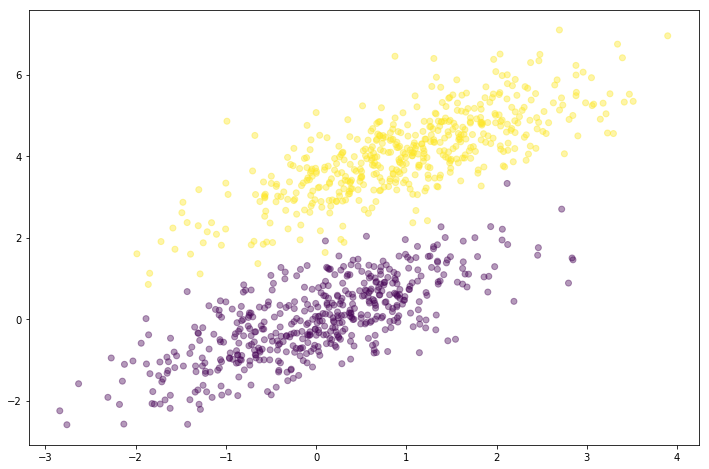

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(binary_features[:, 0], binary_features[:, 1],
            c = binary_labels, alpha = .4)

## Logistic Regression

In [13]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = -np.dot(features.T, output_error_signal) #Derivative of Log-Likelihood -> dll = np.dot(X.T, (Y - predictions))
        weights -= learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [14]:
weights = logistic_regression(binary_features, binary_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

641.9094625794814
21.614844302477678
17.003436279619677
15.199598727005446
14.210763822769955
13.58001684484908
13.140967080895726
12.817410576389456
12.569168561540689
12.372915736556862
12.214124955870695
12.083249638412271
11.973744498413328
11.880965127283826
11.801520947780245
11.732876850140283
11.67309831761224
11.620682942511918
11.574445876200883
11.533440021046594
11.496899221418104
11.46419705050353
11.43481640086955
11.408326703203368
11.384366624200599
11.36263076146398
11.342859295545141
11.324829858088043
11.30835108039992
11.293257430131037


In [15]:
data_with_intercept = np.hstack((np.ones((binary_features.shape[0], 1)),
                                 binary_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == binary_labels).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.994


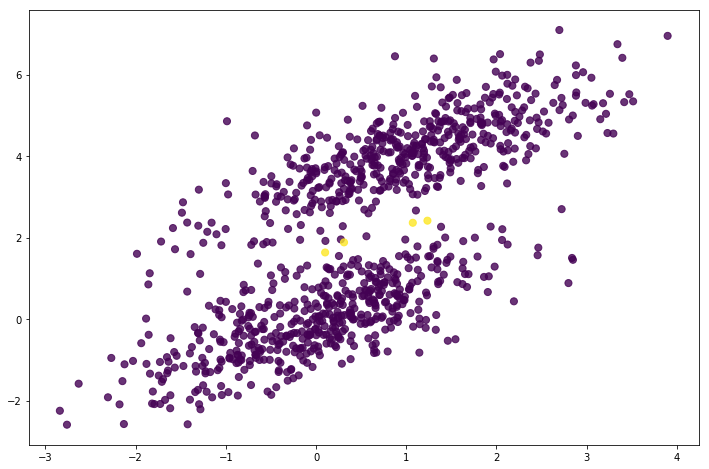

In [16]:
plt.figure(figsize = (12, 8))
plt.scatter(binary_features[:, 0], binary_features[:, 1],
            c = preds == binary_labels - 1, alpha = .8, s = 50)